In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
with open('output.txt', 'w') as output:
    create_points(x_step=0.1, z_min=0.15, f_out=output)

In [115]:
def create_points(x_step, x_min=0.05, x_max=1, y_step=None, y_min=None, y_max=None,
                  z_step=None, z_min=None, z_max=None, f_out=None):
            
    if y_step == None: y_step = x_step
    if y_min == None: y_min = x_min
    if y_max == None: y_max = x_max

    if z_step == None: z_step = x_step
    if z_min == None: z_min = x_min
    if z_max == None: z_max = x_max

    xs = np.round(np.arange(x_min, x_max, x_step),2)
    ys = np.round(np.arange(y_min, y_max, y_step),2)
    zs = np.round(np.arange(z_min, z_max, z_step),2)

    brace_l = '{'
    brace_r = '}'
    i=0
    for z in zs:
        for y in ys:
            for x in xs:
                i+=1
                print(f'\t\tpoint_{i} {brace_l}', file=f_out)
                print(f'\t\t\tx = domain.x + {x} * domain.length;', file=f_out)
                print(f'\t\t\ty = domain.y + {y} * domain.width;', file=f_out)
                print(f'\t\t\tz = domain.z + {z} * domain.height;', file=f_out)
                print(f'\t\t{brace_r}', file=f_out)
    

In [20]:
with open('output.txt', 'w') as f_out:
    brace_l = '{'
    brace_r = '}'
    n=0
    xs = np.round(np.arange(0.05, 1, 0.1),2)
    ys = np.round(np.arange(0.05, 1, 0.1),2)
    zs = np.round(np.arange(0.25, 1, 0.1),2)
    for z in zs:
        for y in ys:
            for x in xs:
                n+=1
                print(f'\t\tpoint_{n} {brace_l}', file=f_out)
                print(f'\t\t\tx = domain.x + {x} * domain.length;', file=f_out)
                print(f'\t\t\ty = domain.y + {y} * domain.width;', file=f_out)
                print(f'\t\t\tz = domain.z + {z} * domain.height;', file=f_out)
                print(f'\t\t{brace_r}', file=f_out)
               
    ys = np.arange(0.075, 0.75, 0.15)
    xs = np.arange(0.225, 0.9, 0.15)
    coord = np.meshgrid(xs, ys, indexing='ij')

    mask = np.full(np.shape(coord[1]),True)
    for i in range(mask.shape[0]):
        if i%2 ==0:
            mask[3:,i][::4]=False
        else:
            mask[1:,i][::4]=False

    xs = np.array([])
    ys = np.array([])
    for i in [0,4.8]:
        for j in [0,3]:
            xs = np.r_[xs,coord[0][mask]+i]
            ys = np.r_[ys,coord[1][mask]+j]


    xs = np.round(np.r_[xs,coord[0][mask]+2.4],3)
    ys = np.round(np.r_[ys,coord[1][mask]+1.5],3)
    
    for z in [0.05, 0.15]:
        for x,y in zip(xs,ys):
            n+=1
            print(f'\t\tpoint_{n} {brace_l}', file=f_out)
            print(f'\t\t\tx = domain.x + {x} * domain.height;', file=f_out)
            print(f'\t\t\ty = domain.y + {y} * domain.height;', file=f_out)
            print(f'\t\t\tz = domain.z + {z} * domain.height;', file=f_out)
            print(f'\t\t{brace_r}', file=f_out)

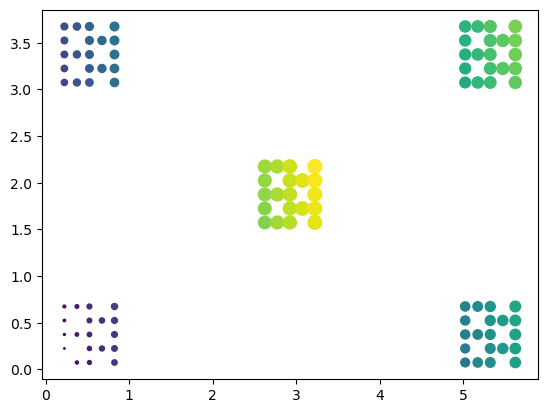

In [22]:
plt.scatter(xs,ys,c=np.arange(100),s=np.arange(100))

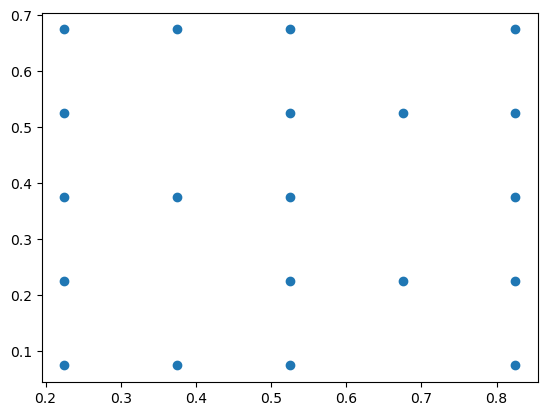

In [16]:
plt.scatter(coord[0][mask],coord[1][mask])